# Linear Reg using Tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import numpy as np

### Generate Data

In [3]:
n_samples = 15
x = np.arange(n_samples)
y = 4*x+ 10*np.random.rand(n_samples)

In [4]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [5]:
y

array([ 8.70648141, 11.55077066, 10.14482983, 20.94002924, 22.61272336,
       24.9795912 , 26.58598307, 32.4425313 , 37.55822837, 37.09003588,
       41.44928085, 45.72493478, 53.99255667, 59.19034584, 56.85787089])

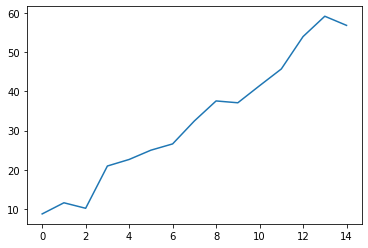

In [6]:
plt.plot(x,y)
plt.show()

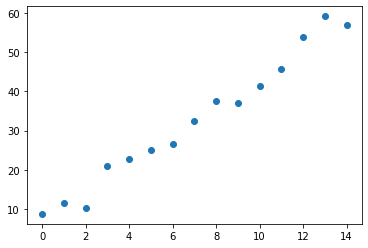

In [11]:
plt.scatter(x,y)
plt.show()

# Build the model

In [12]:
w = tf.Variable(np.random.rand(), name='weight')
b = tf.Variable(np.random.rand(), name='bias')

In [13]:
print(w.numpy())

0.9435588


In [14]:
print(b.numpy())

0.7766414


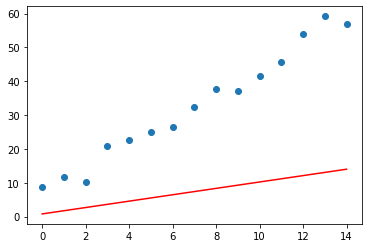

In [15]:
plt.scatter(x,y)
plt.plot(x, np.array(w*x+b), label='best fit line', color='r')
plt.show()

### This can be fixed this by changing weight and bias and we can perform backpropagation for that

# Define ANN terms